# Learning Curves

Polynomial Regression에 degree를 높게 적용한다면, training data에 더 fit하게 될 것이다. 아래 그림은 degree에 따른 polynomial regression model들을 비교한 것이다.

<br/>
<img src="./images/high_degree_polynomial_regression.png" alt="high_degree_polynomial_regression" width="80%"> 
<br/>

위 그림에서 high-degree model은 overfitting되었고, linear model은 underfitting 되었으므로, 가장 일반화가 잘된 모델은 quadratic model이라는 것을 알 수 있다.

위의 경우는 quadratic equation에서 data가 생성되었기 때문이지만, 만약, 어떤 function에서 데이터가 생성되었는지 모른다면, 어떻게 model의 complexity를 결정해야 할까? 어떻게 model이 data에 overfitting 또는 underfitting되었다고 말할 수 있을까?

2장에서는 cross-validation을 사용해 model의 generalization performance를 평가하였다. training data에는 잘 동작하지만, cross-validation에서 성능이 좋지 않다면, overfitting, 둘 모두에 잘 동작하지 않는다면, underfitting이라고 판단하였다. 전자의 경우는 model이 complex한 경우이고, 후자의 경우는 model이 simple한 경우이다.

다른 방법으로는, **learning curve**를 보는 것이 있다. 이 방법은 training set size(또는 training iteration)에 따른 training set과 validation set의 performance를 plot한다.

아래 코드는 training set size에 따른 model의 learning curve를 그리는 함수이다.

In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=2, label="val")
    plt.axis([0, 80, 0, 3])
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.legend()

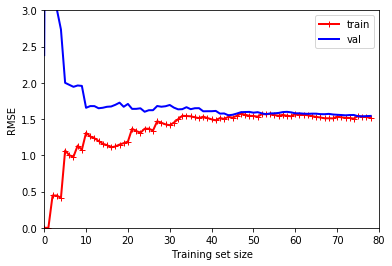

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

위와 같이 두 learning curve가 꽤 높은 error에서 가깝게 plateaue해지는 형태는 일반적인 underfitting model의 경우이다. 이러한 경우, 데이터를 더 추가하는 것은 도움이 되지 않으며, 모델의 complexity를 증가시켜야 한다.

같은 데이터에 대해 10th-degree polynomial model로 학습시켜보자.

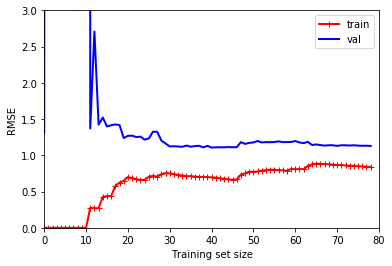

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_featrures", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)

앞의 linear 모델과 약간 비슷하지만, 2가지 중요한 차이점이 있다.
- error가 더 줄어들었다.
- 두 curve 사이의 간격이 더 크므로, validation data에서보다 training data에서 더 성능이 좋으며 이는 overfitting되었다는 것을 의미한다. 여기서 training data를 더 추가한다면, 두 curve는 계속해서 가까워 질 것이다.

### The Bias/Variance Tradeoff

Model의 generalization error는 다음의 3가지 다른 error의 합으로 나타낼 수 있다.

**Bias**
- 잘못된 가정에 의해 일어나는 error이다. 예를 들어, linear하다고 가정하였는데, 실제로는 quadratic한 경우이다. high-bias model은 training data에 underfit할 가능성이 높다.

**Variance**
- Training data의 작은 변화에도 모델이 과도하게 민감한 경우에 일어나는 error이다. 높은 자유도를 가지는 모델(예를 들면, high-degree polynomial model)의 경우 high variance를 가지기 쉬우므로 training data에 overfit할 가능성이 높다.

**Irreducible error**
- Data의 noise에 의한 error이다. 이를 줄이기 위해서는 data를 clean up하는 방법밖에 없다.(예를 들어, 고장난 sensor를 고쳐 올바른 data를 얻도록 하거나 outlier를 제거하는 방법 등이 있다)

일반적으로 모델의 complexity가 커지면, variance가 증가하며 bias는 감소한다. 반대로 complexity가 줄어들면, bias가 증가하고, variance가 감소한다. 따라서, 이를 bias/variance trade off라고 한다.